email_path.txt consists of path to emails. **Spam emails** 52790 and **ham emails** 39398 total of 92188

In [74]:
import pandas as pd
import os
import mailparser
from nlpia.loaders import get_data
from nltk.tokenize import casual_tokenize
from matplotlib import pyplot as plt
import seaborn
import pandas as pd
import numpy as np
import spacy
import seaborn as sns
import collections
import pickle
from itertools import islice
from spacy.tokenizer import Tokenizer
from sklearn.decomposition import PCA
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)
pd.options.display.max_columns = 1000

### Machine learning from saved model

In [75]:
# load the model from disk
filename = 'PCA_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [76]:
def getting_emails(count):
    email_list = []
    f1 = open('email_path.txt', 'r')
    numlim = count+2000;
    for line in islice(f1, count, None):
    #for i,line in enumerate(f1):
        count += 1
        l1= line.split(',')
        path_mail = l1[0]
        isspam = l1[1]
        if (count<=numlim):
            mail = mailparser.parse_from_file(path_mail)
            email_list.append({'path': path_mail, 'Date':mail.date, 'Body': mail.body, \
                          'From':mail.from_, 'message_id': mail.message_id, 'subject': mail.subject,\
                          'To': mail.to, 'isspam': isspam})
        else:
            break
    email_list_df = pd.DataFrame(email_list) 
    email_list_df.replace(to_replace= 'spam \n', value= 0, regex=True, inplace= True)
    email_list_df.replace(to_replace= 'ham \n', value= 1, regex=True, inplace= True)
    f1.close()
    #email_list_df.head()
    return(email_list_df)

In [77]:
def iter_spacy(strs, tokenizer):
    words = []
    for s in strs:
        #doc = nlp(s)
        doc = tokenizer(s)
        tokens = [str(token) for token in doc]
        counts = collections.Counter(tokens)
        yield counts

In [78]:
# create test-train set
batchsize = 2000
accuracy_batch = []
predict_batch = []
spam_emails = []
for i in range(2000, 92188, batchsize):  
    count = i+ batchsize
    email_list_df = getting_emails(count)
    #email_list_df.head()
    bows_spacy = pd.DataFrame(iter_spacy(email_list_df.subject, tokenizer )).fillna(0).astype(int)
    collen = (len(bows_spacy.columns))
    diffcol = 3647-collen
    if (diffcol>0): 
        for i in range(diffcol):
            colname = str(collen+i)
            bows_spacy[colname] = pd.Series(np.zeros(batchsize), index=bows_spacy.index)
    elif(diffcol<0):
        dropcols = bows_spacy[bows_spacy.columns[np.abs(diffcol):]]
        bows_spacy = dropcols
    X = bows_spacy.values
    Y = email_list_df.isspam
    pca = PCA(n_components=160)
    topic_vectors = pca.fit_transform(X)
    accuracy_batch.append(loaded_model.score(topic_vectors, Y))
    predict_batch.append(loaded_model.predict(topic_vectors))
    spam_emails.append(email_list_df.isspam.values)

2018-12-25 09:01:54,034   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from cic.ac.id 218.37.76.78 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl47028 for <plucci@ect.enron.com>; Sun, 15 Jul 2001 10:29:59 -0500 CDT
2018-12-25 09:01:54,982   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from muir.freedomnet.com 66.216.74.58 by we.futuramail.com InterMail vK.4.04.00.00 470-772-920 license 438765kt18lo8rwq8hg371r7s66n3v08 with ESMTP id <20033378903844.SWYJ901.we@muir.freedomnet.com> for <kkeiser@enron.com>; Wed, 23 Jan 2002 18:21:03 -0800 Received: from Melissa 194.63.250.67 by muir.freedomnet.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with

2018-12-25 09:02:16,186   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from sidestep.freedomnet.com 64.255.238.196 by heater.cabana.net InterMail vK.4.04.00.00 691-589-324 license 300535sm87id2rls8hx949m1y05r2c73 with ESMTP id <20037970889661.DLKD979.heater@sidestep.freedomnet.com> for <Andy.Zipper@enron.com>; Mon, 13 Aug 2001 06:01:57 -0800 Received: from Janice 211.174.63.216 by sidestep.freedomnet.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0LFR003LHXG29R@sidestep.freedomnet.com> for Andy.Zipper@enron.com; Mon, 13 Aug 2001 16:59:57 +0300 IDT
2018-12-25 09:02:17,477   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from amigo-27agh5

2018-12-25 09:02:39,343   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:by\s+(?P<by>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from EHLO mta2.mkgzwfa.bbj.aol.com by mta555.mail.bbj.gmail.com with SMTP; Thu, 20 Sep 2001 08:53:36 -0100 by mta555.mail..aol.com with SMTP; Thu, 20 Sep 2001 13:53:36 +0400
2018-12-25 09:02:39,523   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from Unknown UID 1684@localhost by wlite1a.bora.net 8.11.6/8.11.6 id j1DFMWZ02813; Thu, 20 Sep 2001 21:27:34 +0900
2018-12-25 09:02:40,128   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from bodybuild.wprost.pl 81.1

2018-12-25 09:03:37,043   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from jktsm03 jktsm03.indosat.net.id 202.155.50.4 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id fBRHbIl07863 for <Geoff.Storey@ENRON.com>; Thu, 27 Dec 2001 11:37:19 -0600 CST
2018-12-25 09:03:37,044   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from oemcomputer ppp36-sby.indosat.net.id 202.155.3.36 by imsmta3.indosat.net.id iPlanet Messaging Server 5.1 built May 7 2001 with SMTP id <0GP000IF4JSCQP@imsmta3.indosat.net.id> for Geoff.Storey@ENRON.com; Fri, 28 Dec 2001 00:41:37 +0700 JVT
2018-12-25 09:03:55,301   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:with(?! cipher

2018-12-25 09:04:01,130   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from hardbake.worldmailer.com 221.124.16.175 by lozenge.cabana.net InterMail vK.4.04.00.00 766-019-160 license 771082bx62av6xxb5fe084k2p61p3r13 with ESMTP id <20035078146785.EXIX710.lozenge@hardbake.worldmailer.com> for <Lisa.Gang@ENRON.com>; Thu, 30 Aug 2001 12:11:10 -0500 Received: from Orville 213.130.63.235 by hardbake.worldmailer.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0FZX004DETK68S@hardbake.worldmailer.com> for Lisa.Gang@ENRON.com; Thu, 30 Aug 2001 11:11:10 -0600 IDT
2018-12-25 09:04:01,460   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from hardbake.

2018-12-25 09:04:09,754   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from hospice.gamewood.net 195.70.36.206 by peanut.freewebemail.com InterMail vK.4.04.00.00 940-772-631 license 260598sm20kf2cxd3pd339o7t34r7y07 with ESMTP id <20036576039196.VGAD466.peanut@hospice.gamewood.net> for <JOE.PARKS@BRIDGELINE.NET>; Mon, 21 Jan 2002 19:12:45 +0200 Received: from Christie 213.130.63.235 by hospice.gamewood.net iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0WHG006LOOW71N@hospice.gamewood.net> for JOE.PARKS@BRIDGELINE.NET; Mon, 21 Jan 2002 16:11:45 -0100 IDT Date: Mon, 21 Jan 2002 19:12:45 +0200
2018-12-25 09:04:09,911   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id

2018-12-25 09:04:27,722   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from GD7XI51GMGH8GID 211.211.85.225 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl17566 for <RBuy@enron.com>; Thu, 14 Feb 2002 01:58:51 -0600 CST
2018-12-25 09:04:28,043   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from GD7XI51GMGH8GID 211.211.85.225 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl17566 for <RBuy@enron.com>; Thu, 14 Feb 2002 01:58:51 -0600 CST
2018-12-25 09:04:28,101   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;))

2018-12-25 09:04:43,121   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from coast.france.com 211.152.65.175 by anisotropy.worldsite.net InterMail vK.4.04.00.00 722-711-276 license 080200pr12uq1coo4lo726p6a87h3k31 with ESMTP id <20034295914619.NPSC993.anisotropy@coast.france.com> for <Mark.E.Haedicke@enron.com>; Wed, 15 Aug 2001 01:03:44 -0600 Received: from Anderson 207.162.131.10 by coast.france.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0RSR006YKDR82C@coast.france.com> for Mark.E.Haedicke@enron.com; Wed, 15 Aug 2001 00:58:44 -0600 IDT
2018-12-25 09:04:43,584   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:for\s+(?P<for>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+id|\s+via|;)) in from webmail-smtp01.iol.pt unknow

2018-12-25 09:04:46,184   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from Unknown UID 1684@localhost by wlite1b.bora.net 8.11.6/8.11.6 id j2B2H6G16491; Thu, 8 Nov 2001 14:57:40 +0900
2018-12-25 09:04:46,212   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from bipartisan.gemlink.com 67.96.63.112 by bashful.flytecrew.com InterMail vK.4.04.00.00 452-014-367 license 157643ia34ht2zoa6iw425j7k11h5g03 with ESMTP id <20034697719295.QIIX476.bashful@bipartisan.gemlink.com> for <rbuy@ect.enron.com>; Wed, 5 Sep 2001 14:24:51 -0800 Received: from Nita 206.246.241.152 by bipartisan.gemlink.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0BLY000WIMK20L@bipart

2018-12-25 09:04:56,588   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from covetous.funmail.co.uk 12.162.162.246 by cardiology.ayna.com InterMail vK.4.04.00.00 166-470-223 license 476331rf59lp8obm8pg665p7m27f6p21 with ESMTP id <20036295106354.HDBK767.cardiology@covetous.funmail.co.uk> for <kkeiser@ect.enron.com>; Thu, 27 Jul 2000 05:18:32 +0200 Received: from Christie 66.215.191.178 by covetous.funmail.co.uk iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0PSB004WTSN98B@covetous.funmail.co.uk> for kkeiser@ect.enron.com; Thu, 27 Jul 2000 00:14:32 -0300 IDT
2018-12-25 09:04:56,864   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from covetous

2018-12-25 09:05:16,280   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from homecoming.free-online.net 209.107.130.39 by legend.forfree.at InterMail vK.4.04.00.00 066-645-028 license 148321gb94zh1hlc7lo876b2a56x4v19 with ESMTP id <20032174294112.JGEU194.legend@homecoming.free-online.net> for <Richard.Ring@enron.com>; Sat, 16 Feb 2002 00:21:04 -0500 Received: from Solomon 66.13.4.155 by homecoming.free-online.net iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0OXY005DXAX22J@homecoming.free-online.net> for Richard.Ring@enron.com; Sat, 16 Feb 2002 02:20:04 -0300 IDT Date: Sat, 16 Feb 2002 00:21:04 -0500
2018-12-25 09:05:16,529   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! ci

2018-12-25 09:05:17,919   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from ppp-jt2-c.telkom.net.id ppp-jt2-c.telkom.net.id 61.5.17.59 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl68584 for <Vladi.Pimenov@enron.com>; Thu, 20 Jun 2002 08:32:47 -0500 CDT
2018-12-25 09:05:24,865   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from galvanova.ch 216.157.146.64 by deficit.expo.co.id InterMail vK.4.04.00.00 386-234-117 license 1cf642uo0006a3dp7l2jbm8299z0zud3 with ESMTP id <20039062481355.WYWB8055.arteriole@galvanova.ch> for <MATT.SMITH@enron.com>; Sun, 30 Dec 2001 12:08:59 -0700
2018-12-25 09:05:24,980   ERROR:mailparser.utils:273:      parse_received More than one match 

2018-12-25 09:05:32,153   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from carmax.com ppp-rungkut-a.telkom.net.id 61.5.113.202 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl83906 for <scorman@enron.com>; Thu, 7 Mar 2002 17:56:51 -0600 CST
2018-12-25 09:05:32,202   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from carmax.com ppp-rungkut-a.telkom.net.id 61.5.113.202 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl38092 for <matt.motley@enron.com>; Thu, 7 Mar 2002 17:52:01 -0600 CST
2018-12-25 09:05:32,224   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|

2018-12-25 09:05:35,842   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from carmax.com ppp-rungkut-a.telkom.net.id 61.5.113.202 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl94974 for <ebass@enron.com>; Thu, 7 Mar 2002 17:58:41 -0600 CST
2018-12-25 09:05:36,072   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)) in from carmax.com ppp-rungkut-a.telkom.net.id 61.5.113.202 by mailman.enron.com 8.11.4/8.11.4/corp-1.06 with ESMTP id g343Bbl80997 for <tlokey@enron.com>; Thu, 7 Mar 2002 17:51:01 -0600 CST
2018-12-25 09:05:36,197   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:with(?! cipher)\s+(?P<with>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope

2018-12-25 09:06:11,320   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from gobbledygook.freechina.com 132.148.87.40 by equilibrate.gamport.com InterMail vK.4.04.00.00 523-736-599 license 183973zu68xx2khq9ry637s2z90p6p61 with ESMTP id <20033742726106.YAIN957.equilibrate@gobbledygook.freechina.com> for <Michael.E.Taylor@enron.com>; Wed, 16 Jan 2002 23:05:50 -0800 Received: from Lorraine 213.40.66.86 by gobbledygook.freechina.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0TIL000DSGD63F@gobbledygook.freechina.com> for Michael.E.Taylor@enron.com; Thu, 17 Jan 2002 10:00:50 +0300 IDT
2018-12-25 09:06:11,690   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:id\s+(?P<id>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+by|\s+with(?! cipher)|\s+for|\s+via|;)

2018-12-25 09:06:13,848   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:by\s+(?P<by>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from EHLO mta2.yvdehnf.bbj.acml.com by mta073.mail.bbj.acml.com with SMTP; Tue, 26 Feb 2002 17:08:43 +0200 by mta108.mail.erratum.acml.com with SMTP; Tue, 26 Feb 2002 13:04:43 -0200
2018-12-25 09:06:13,965   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:by\s+(?P<by>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from EHLO mta2.yvdehnf.bbj.acml.com by mta073.mail.bbj.acml.com with SMTP; Tue, 26 Feb 2002 17:08:43 +0200 by mta108.mail.erratum.acml.com with SMTP; Tue, 26 Feb 2002 13:04:43 -0200
2018-12-25 09:06:14,054   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:by\s+(?P<by>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+from|\s+with(?!

2018-12-25 09:06:22,295   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from cannon.c4.com 216.240.33.201 by cytoplasm.cabana.net InterMail vK.4.04.00.00 275-575-001 license 608844bv90il7zpt4ws893u6f78s9p95 with ESMTP id <20039731458558.QIMQ876.cytoplasm@cannon.c4.com> for <JREITME@ECT.ENRON.COM>; Sun, 30 Sep 2001 00:13:54 -0800 Received: from Alex 206.191.190.8 by cannon.c4.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0ZRF002CDUQ18C@cannon.c4.com> for JREITME@ECT.ENRON.COM; Sun, 30 Sep 2001 03:04:54 -0500 IDT
2018-12-25 09:06:22,789   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from cannon.c4.com 216.240.33.201 by cytoplasm.cabana.

2018-12-25 09:06:54,232   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from dill.ausi.com 208.38.152.40 by quaff.gauch.ch InterMail vK.4.04.00.00 700-016-882 license %LICENSE with ESMTP id <20035310985965.GIKN488.quaff@dill.ausi.com> for <dl-ga-canada_calgary@enron.com>; Thu, 25 Oct 2001 01:58:19 -0800 Received: from Major 12.137.19.0 by dill.ausi.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0BGM007UFTC97A@dill.ausi.com> for dl-ga-canada_calgary@enron.com; Thu, 25 Oct 2001 13:57:19 +0400 IDT
2018-12-25 09:06:54,258   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from dill.ausi.com 208.38.152.40 by quaff.gauch.ch InterMail vK.4.04.00.

2018-12-25 09:07:28,344   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from database.gamport.com 207.178.128.18 by buff.fsf.com.au InterMail vK.4.04.00.00 434-022-418 license 477299fh03zd2omn1ud251k0w69o8k63 with ESMTP id <20037284243678.BRQW028.buff@database.gamport.com> for <SKEAN@ENRON.COM>; Sat, 2 Feb 2002 09:36:48 -0800 Received: from Edgardo 65.56.1.210 by database.gamport.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0KEG005GFQO54S@database.gamport.com> for SKEAN@ENRON.COM; Sat, 2 Feb 2002 21:29:48 +0400 IDT Date: Sat, 2 Feb 2002 09:36:48 -0800
2018-12-25 09:07:28,537   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from databas

2018-12-25 09:07:30,246   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\s+(?P<from>.+?)(?:\s*[(]?envelope-from|\s*[(]?envelope-sender|\s+by|\s+with(?! cipher)|\s+id|\s+for|\s+via|;)) in from low.worldaccessnet.com 212.150.54.146 by rafael.fsf.com.au InterMail vK.4.04.00.00 418-852-235 license 178883sg78ep6xef0gb462m2g99r8k46 with ESMTP id <20036181487068.KKFK730.rafael@low.worldaccessnet.com> for <EBASS@ENRON.COM>; Sun, 17 Feb 2002 17:32:27 -0800 Received: from Emilio 193.110.243.34 by low.worldaccessnet.com iPlanet Messaging Server 5.2 HotFix 1.14 built Mar 18 2003 with ESMTPA id <0ARS001EXTP67S@low.worldaccessnet.com> for EBASS@ENRON.COM; Sun, 17 Feb 2002 21:23:27 -0400 IDT Date: Sun, 17 Feb 2002 17:32:27 -0800
2018-12-25 09:07:30,282   ERROR:mailparser.utils:290:      parse_received Unable to match any clauses in ceo
2018-12-25 09:07:30,512   ERROR:mailparser.utils:273:      parse_received More than one match found for (?:(?:^|\s)from\

AssertionError: unexpected binascii.Error

In [79]:
AA1 = (np.asarray(predict_batch)).reshape(58000,1)
AA1[AA1<1e-4] = 0
AA1[AA1 >=1e-4] = 1
AA2 = ((np.asarray(spam_emails)).flatten()).reshape(58000,1)
t_y = (np.concatenate((AA1, AA2), axis=1))

In [80]:
def confusion(predictions, actuals):
    actuals=actuals.values[:,0] if isinstance(actuals,pd.DataFrame) else actuals
    
    true_pos= (predictions==1) & (actuals==1)
    true_pos.sum()
    true_neg= (predictions==0) & (actuals==0)
    true_neg.sum()
    false_pos= (predictions==1) & (actuals==0)
    false_pos.sum()
    false_neg= (predictions==0) & (actuals==1)
    false_neg.sum()
    
    prec=true_pos.sum()/(true_pos.sum()+false_pos.sum())
    accur=(true_pos.sum()+true_neg.sum())/(true_pos.sum()+false_pos.sum()+ \
                                           true_neg.sum()+ false_neg.sum())
    recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())
    F1=2*(prec*recall/(prec+recall))
 
    return(true_pos.sum(), false_pos.sum(),false_neg.sum(),true_neg.sum(), accur,recall, prec, F1)

In [81]:
np.array((confusion(t_y[:,0], t_y[:,1])))

array([1.40240000e+04, 1.95050000e+04, 1.06490000e+04, 1.38220000e+04,
       4.80103448e-01, 5.68394601e-01, 4.18264786e-01, 4.81907838e-01])

### Histogram Plot

In [82]:
def bar_plot_compare_fake_real(x,bins,xlabel,figname):
    """ This function creates bar chart to compare different parameters
    
    """
    sns.set(rc={"figure.figsize": (12, 6)})
    sns.set_style("white")
    sns.despine()
    ax1 = sns.distplot(x, bins=bins, kde=True,
                    hist_kws=dict(edgecolor='k', lw=0.5, alpha=0.5), kde_kws={'linewidth': 4})
    #ax2 = sns.distplot(y, bins=bins, 
    #               color='Blue', kde=True, hist_kws=dict(edgecolor='k', lw=0.5, alpha=0.3), kde_kws={'linewidth': 4})
    #kde=True,
    ax1.set_xlabel(xlabel, fontsize=20)
    ax1.set_ylabel('Density Distribution', fontsize=20)
    ax1.tick_params(direction='out', length=6, width=2, colors='k')
    ax1.tick_params(axis='both', which='major', labelsize=20)
    ax1.grid(True, which='major', axis='y', color="white", linewidth=1, zorder=1)
    #vals = ax.get_yticks()
    #plt.yticklabels(['{:3.1f}%'.format(y) for y in vals])
    #plt.setp( ax.xaxis.get_majorticklabels(), rotation=0)
    # Hide the right and top spines
    sns.despine(top=True, right=True, left=False, bottom=False) 
    #plt.legend(loc='upper right', fontsize=20,labels=['Fake','Real'])
    plt.savefig(figname, bbox_inches='tight')
    plt.show()

/home/titli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


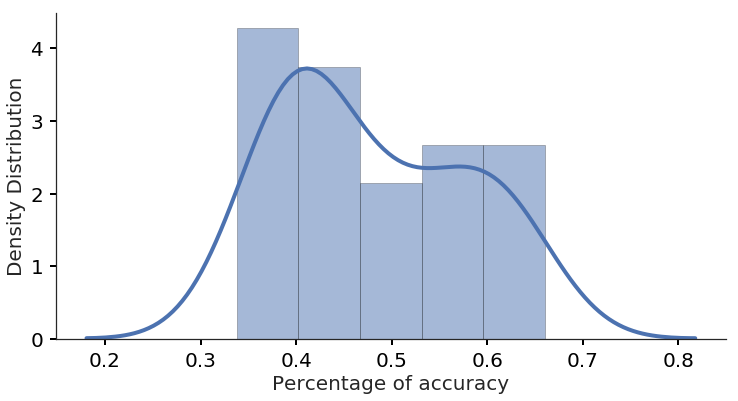

In [83]:
bar_plot_compare_fake_real(accuracy_batch, 5,'Percentage of accuracy', '4.png')